In [14]:
import os, numpy as np, pandas as pd, csv, matplotlib.pyplot as plt
from datetime import datetime

######################################################Initial Packages########################################################
#Basic Operating System Stuff
import os, gc, random

#Basic dataframe, array, and math stuff
import pandas as pd #data frame
import math #math functions
import numpy as np    #numerical package

#Scikit learn
import sklearn as sk  #scikit learn
from sklearn import metrics
from sklearn.model_selection import train_test_split as tts #train test split
from sklearn.metrics import confusion_matrix, roc_curve, classification_report as CR #for 2-class model
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.metrics import f1_score as f1

#Tensorflow
import tensorflow as tf
from tensorflow.python.client import device_lib #GPU Check
import tensorflow.keras #keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential,Input,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Add, Activation, ZeroPadding2D,GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization,Conv2D, Conv3D,AveragePooling2D, MaxPooling2D, MaxPooling3D,GlobalMaxPooling2D, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint #use for early stopping and reduction on level-out
from tensorflow.keras.initializers import glorot_uniform, he_uniform #to initialize random weights for filters
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions, preprocess_input
from tensorflow.keras.models import Model, load_model  #Can't do much without a model
from tensorflow.keras import utils
from tensorflow.keras.utils import get_file, plot_model, to_categorical, model_to_dot
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50V2, MobileNetV2, VGG16, ResNet152, EfficientNetB6 as ENETB6
import tensorflow.keras.backend as K #let's write our own metrics and loss functions
from tensorflow.keras.utils import plot_model

#Graphing
import cv2
from PIL import Image
import glob           #helps read files
import matplotlib.pyplot as plt
import graphviz
import pydot_ng as pydot


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12339452362077592374
xla_global_id: -1
]


In [15]:
df_train=pd.read_csv("/content/train.csv")
df_test=pd.read_csv("/content/test.csv")
train=df_train
test=df_test
label=df_train["label"]

In [16]:
trainlab=train['label']
train=train.drop(columns=['label'])
train=train.values.reshape(42000,28,28)
train=train/255
test=test.values.reshape(28000,28,28)
test=test/255

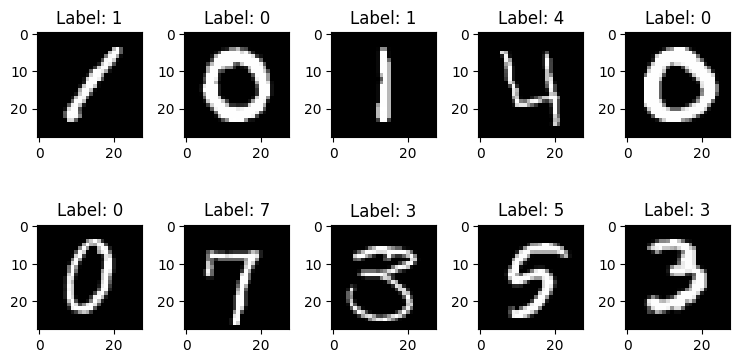

In [17]:
num_row = 2
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(train[i], cmap='gray')
    ax.set_title('Label: {}'.format(trainlab[i]))
plt.tight_layout()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(train, label, test_size=0.2, random_state=42)

In [23]:
img_data_gen=ImageDataGenerator()

model=Sequential()

model.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [24]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.fit(X_train, y_train,epochs=40)

Epoch 1/40
1050/1050 [==============================] - 36s 32ms/step - loss: 0.8795 - accuracy: 0.7093
Epoch 2/40
1050/1050 [==============================] - 30s 29ms/step - loss: 0.3795 - accuracy: 0.8868
Epoch 3/40
1050/1050 [==============================] - 30s 28ms/step - loss: 0.2933 - accuracy: 0.9138
Epoch 4/40
1050/1050 [==============================] - 30s 29ms/step - loss: 0.2424 - accuracy: 0.9300
Epoch 5/40
1050/1050 [==============================] - 30s 29ms/step - loss: 0.2132 - accuracy: 0.9391
Epoch 6/40
1050/1050 [==============================] - 30s 28ms/step - loss: 0.1919 - accuracy: 0.9454
Epoch 7/40
1050/1050 [==============================] - 30s 29ms/step - loss: 0.1738 - accuracy: 0.9498
Epoch 8/40
1050/1050 [==============================] - 32s 30ms/step - loss: 0.1634 - accuracy: 0.9539
Epoch 9/40
1050/1050 [==============================] - 32s 30ms/step - loss: 0.1543 - accuracy: 0.9562
Epoch 10/40
1050/1050 [==============================] - 28s 27m

In [26]:
y_pred = model.predict(X_test)
y_predict = [np.argmax(y_pred[i]) for i in range(len(y_pred))]

263/263 [==============================] - 2s 6ms/step


In [28]:
pred1=tf.argmax(model.predict(train),1)
pd.crosstab(trainlab, pred1, margins=True)

1313/1313 [==============================] - 9s 7ms/step


col_0,0,1,2,3,4,5,6,7,8,9,All
label,,,,,,,,,,,
0,4122,0,1,0,0,0,5,0,1,3,4132
1,0,4672,5,0,0,0,0,7,0,0,4684
2,1,4,4153,2,3,0,1,10,3,0,4177
3,2,0,22,4311,0,8,0,4,0,4,4351
4,1,2,0,0,4028,1,8,2,0,30,4072
5,1,0,0,7,2,3774,8,0,1,2,3795
6,1,1,1,0,0,4,4129,0,1,0,4137
7,0,9,18,0,2,0,0,4370,0,2,4401
8,1,2,8,1,3,3,3,2,4031,9,4063


In [29]:
sum(np.diagonal(pd.crosstab(trainlab,pred1)))/42000

0.9938809523809524